# Librerías

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import openpyxl

# Cargar datos

In [13]:
df = pd.read_csv('/home/jeffersson/Documentos/retencion_clientes/retencion_clientes.csv')
df

,store,Sales,Profit,MTenure,CTenure,Pop,Comp,Visibility,PedCount,Res,Hours24,CrewSkill,MgrSkill,ServQual
0,1,1060294,265014,0.000000,24.804930,7535,2.797888,3,3,1,1,3.56,3.150000,86.84327
1,2,1619874,424007,86.222190,6.636550,8630,4.235555,4,3,1,1,3.20,3.556667,94.73510
2,3,1099921,222735,23.888540,5.026694,9695,4.494666,3,3,1,1,3.80,4.116667,78.94776
3,4,1053860,210122,0.000000,5.371663,2797,4.253946,4,2,1,1,2.06,4.100000,100.00000
4,5,1227841,300480,3.877370,6.866530,20335,1.651364,2,5,0,1,3.65,3.588889,68.42164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,977566,198529,43.899720,38.373720,3265,3.856324,2,1,1,1,3.88,3.466667,79.94253
71,72,848140,196772,126.474500,27.449690,3151,3.680586,2,1,1,1,3.73,3.416667,73.68654
72,73,1115450,279193,41.139550,6.406571,6276,4.180132,4,3,1,1,3.20,4.083333,85.96640
73,74,1782957,518998,171.097200,29.519510,10913,2.319850,3,4,1,0,3.50,4.405556,94.73878


# Limpieza y EDA

In [14]:
df.columns = ["Tienda","Ventas","Utilidad_Bruta","Antiguedad_Gerente","Antiguedad_Personal","Poblacion","Nro_Competidores","Visibilidad","Flujo_Peatonal","Zona_Residencial","24_horas","Habilidad_Personal","Habilidad_Gerente","Calidad_Servicio"]

In [15]:
df.describe()

,Tienda,Ventas,Utilidad_Bruta,Antiguedad_Gerente,Antiguedad_Personal,Poblacion,Nro_Competidores,Visibilidad,Flujo_Peatonal,Zona_Residencial,24_horas,Habilidad_Personal,Habilidad_Gerente,Calidad_Servicio
count,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,38.000000,1.205413e+06,276313.613333,45.296444,13.931499,9825.586667,3.787751,3.080000,2.960000,0.960000,0.840000,3.456667,3.637976,87.153844
std,21.794495,3.045313e+05,89404.076338,57.671551,17.697517,5911.673770,1.311390,0.749053,0.992404,0.197279,0.369075,0.406585,0.408457,12.613392
min,1.000000,6.993060e+05,122180.000000,0.000000,0.887064,1046.000000,1.651364,2.000000,1.000000,0.000000,0.000000,2.060000,2.956667,57.895520
25%,19.500000,9.845790e+05,211003.500000,6.670391,4.394251,5616.500000,3.150664,3.000000,2.000000,1.000000,1.000000,3.225000,3.344445,78.947760
50%,38.000000,1.127332e+06,265014.000000,24.118560,7.211499,8896.000000,3.628561,3.000000,3.000000,1.000000,1.000000,3.500000,3.588889,89.473880
75%,56.500000,1.362388e+06,331313.500000,50.915125,17.215610,14104.000000,4.229525,4.000000,4.000000,1.000000,1.000000,3.655000,3.925000,99.900525
max,75.000000,2.113089e+06,518998.000000,277.987700,114.151900,26519.000000,11.127880,5.000000,5.000000,1.000000,1.000000,4.640000,4.622222,100.000000


In [16]:
df.drop(columns = ["Tienda",'Ventas'], inplace=True)

In [17]:
df['Habilidad_Gerente'] = round(df['Habilidad_Gerente']).astype(int)
df['Habilidad_Personal'] = round(df['Habilidad_Personal']).astype(int)

In [22]:
factores_humanos = ['Antiguedad_Gerente','Antiguedad_Personal','Habilidad_Personal','Habilidad_Gerente','Calidad_Servicio']
factores_ubicacion = ['Poblacion','Nro_Competidores','Visibilidad','Flujo_Peatonal','Zona_Residencial','24_horas']
factores_financieros = ['Utilidad_Bruta']

In [23]:
variables_discretas = ['Visibilidad','Flujo_Peatonal','Zona_Residencial','24_horas','Habilidad_Personal','Habilidad_Gerente']
variables_continuas = ['Utilidad_Bruta','Antiguedad_Gerente','Antiguedad_Personal','Poblacion','Nro_Competidores','Calidad_Servicio']

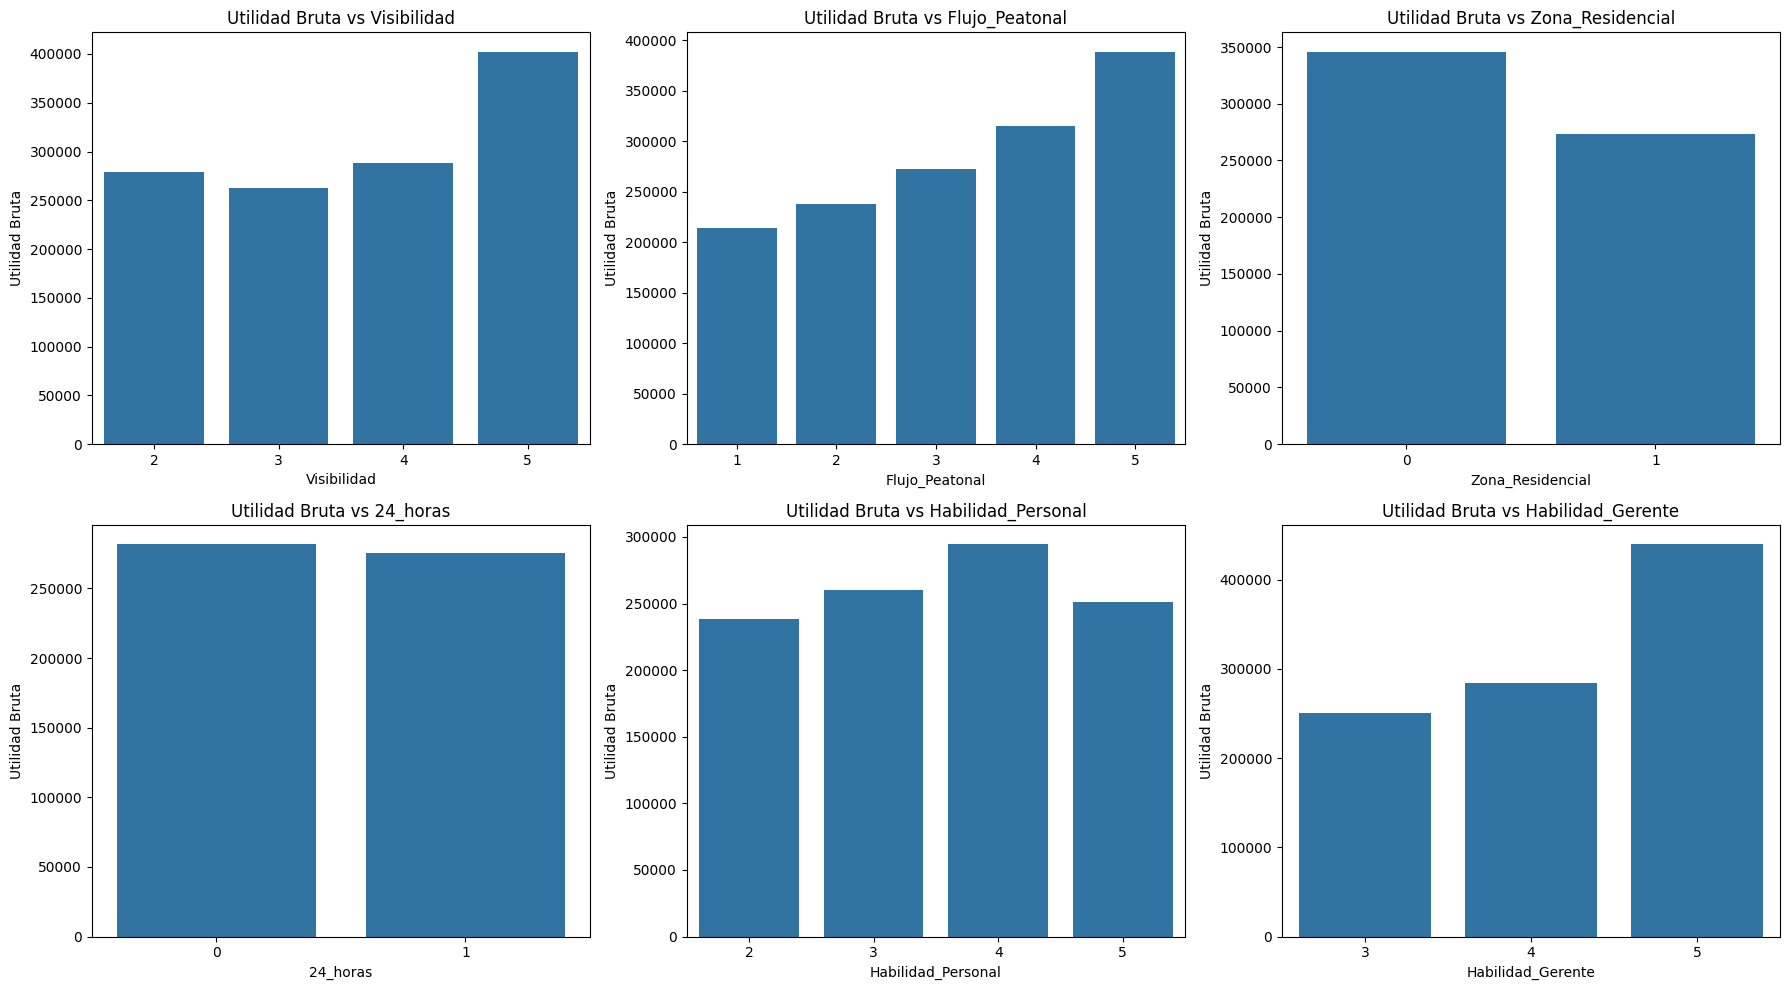

In [27]:
# Creamos un lienzo de 2 x 3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Iteramos las variables_discretas ~ Utilidad Bruta

for i, var in enumerate(variables_discretas):
    row = i // 3
    col = i % 3
    sns.barplot(x=df[var], y=df['Utilidad_Bruta'], ax=axes[row, col], errorbar=None)
    axes[row, col].set_title(f'Utilidad Bruta vs {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Utilidad Bruta')
plt.tight_layout()
plt.show()

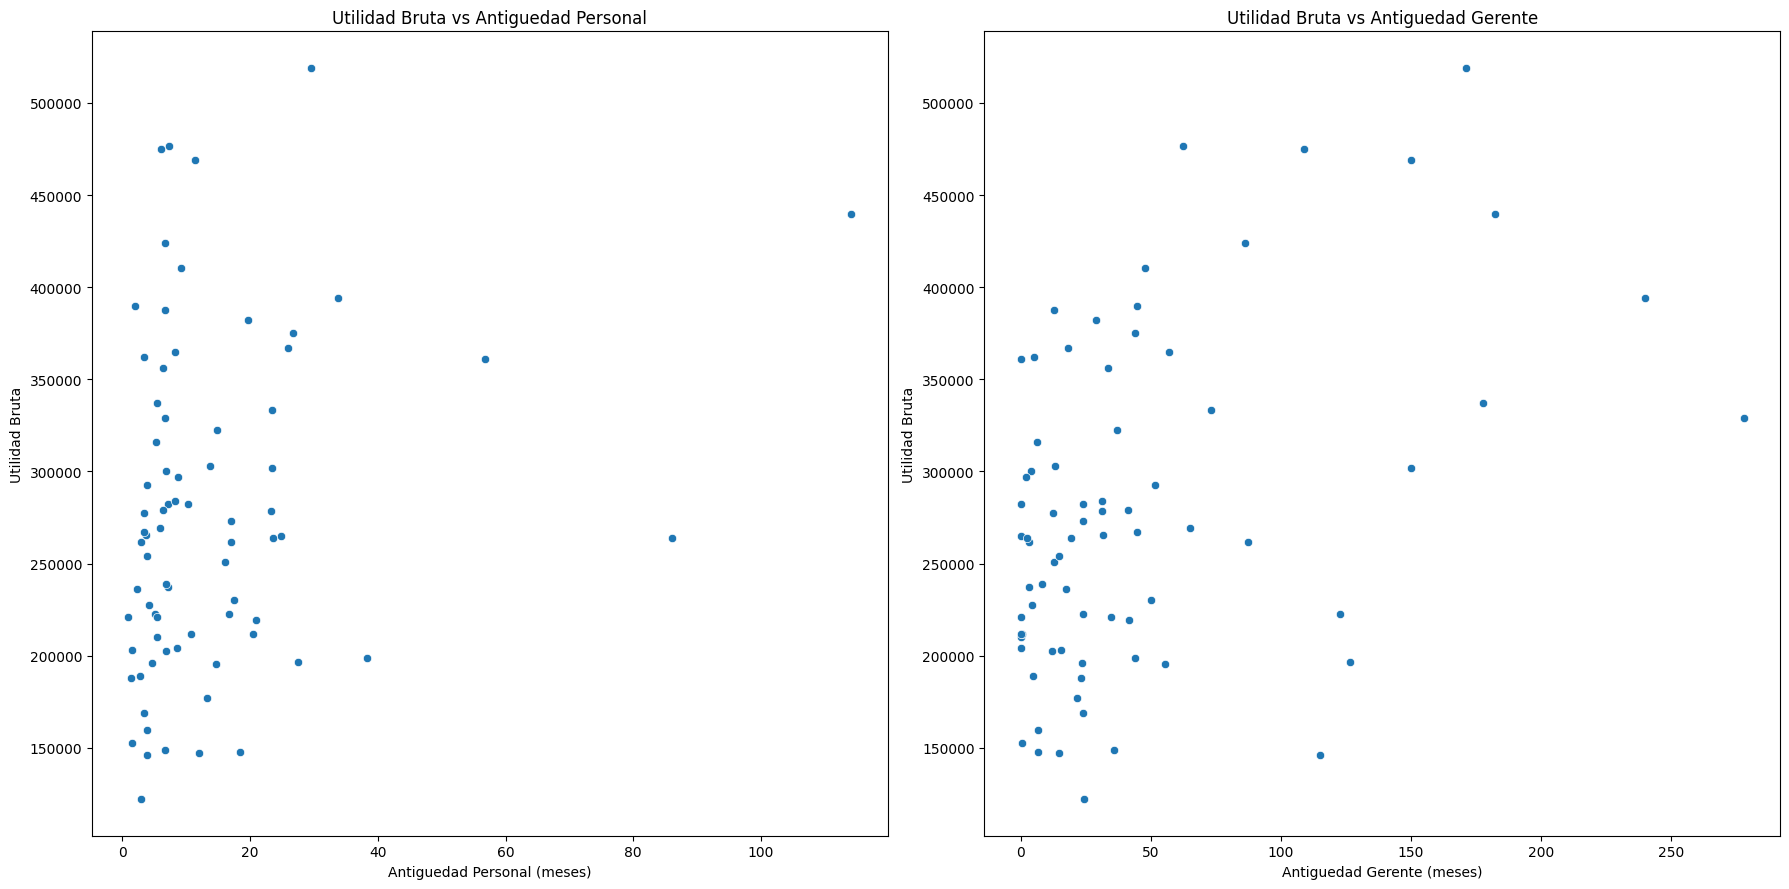

In [56]:
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(1, 2, 2)
sns.scatterplot(data=df, x='Antiguedad_Gerente', y='Utilidad_Bruta', ax=ax1)
ax1.set_title('Utilidad Bruta vs Antiguedad Gerente')
ax1.set_xlabel('Antiguedad Gerente (meses)')
ax1.set_ylabel('Utilidad Bruta')
ax2 = fig.add_subplot(1, 2, 1)
sns.scatterplot(data=df, x='Antiguedad_Personal', y='Utilidad_Bruta', ax=ax2)
ax2.set_title('Utilidad Bruta vs Antiguedad Personal')
ax2.set_xlabel('Antiguedad Personal (meses)')
ax2.set_ylabel('Utilidad Bruta')
plt.tight_layout()
plt.show()

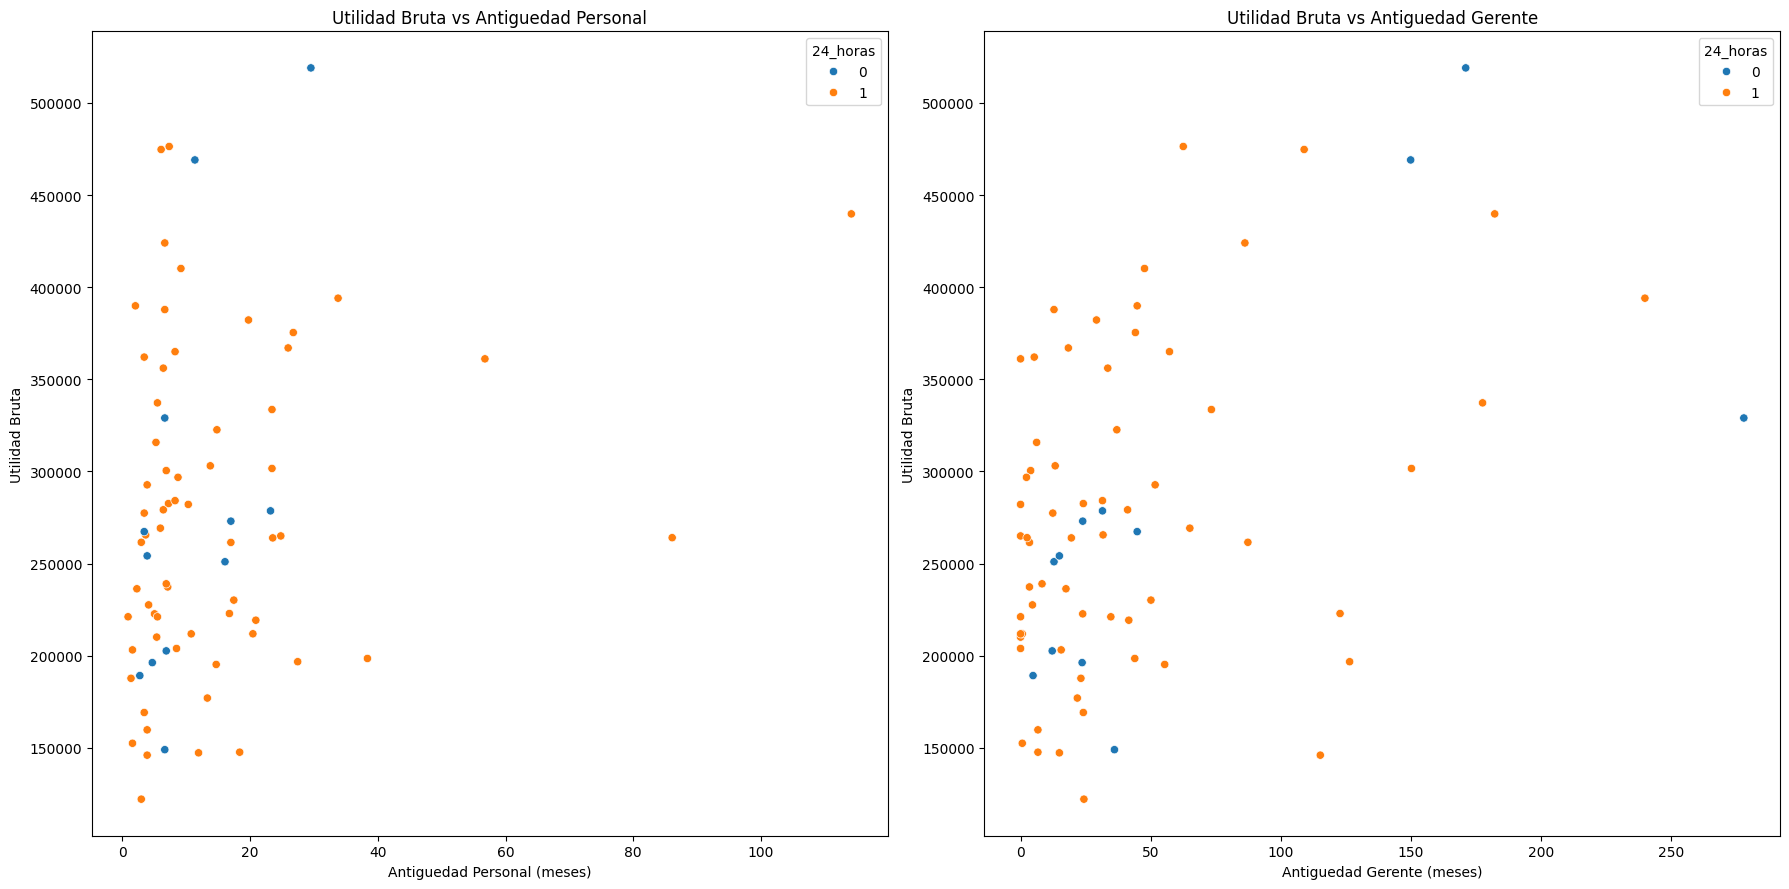

In [57]:
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(1, 2, 2)
sns.scatterplot(data=df, x='Antiguedad_Gerente', y='Utilidad_Bruta', ax=ax1,hue= '24_horas')
ax1.set_title('Utilidad Bruta vs Antiguedad Gerente')
ax1.set_xlabel('Antiguedad Gerente (meses)')
ax1.set_ylabel('Utilidad Bruta')
ax2 = fig.add_subplot(1, 2, 1)
sns.scatterplot(data=df, x='Antiguedad_Personal', y='Utilidad_Bruta', ax=ax2,hue= '24_horas')
ax2.set_title('Utilidad Bruta vs Antiguedad Personal')
ax2.set_xlabel('Antiguedad Personal (meses)')
ax2.set_ylabel('Utilidad Bruta')
plt.tight_layout()
plt.show()

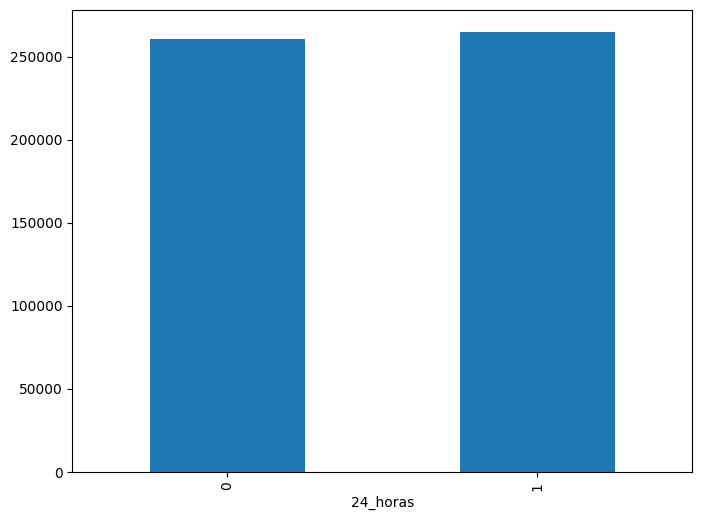

In [66]:
df.groupby('24_horas')['Utilidad_Bruta'].median().plot(kind='bar', figsize=(8,6))
plt.show()

In [64]:
df['24_horas'].value_counts()

24_horas
1    63
0    12
Name: count, dtype: int64

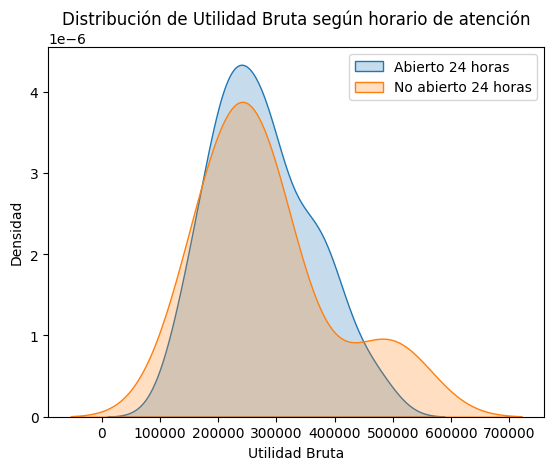

In [67]:
grupo_1 = df[df['24_horas'] == 1]['Utilidad_Bruta']
grupo_0 = df[df['24_horas'] == 0]['Utilidad_Bruta']

sns.kdeplot(grupo_1, label='Abierto 24 horas', fill=True)
sns.kdeplot(grupo_0, label='No abierto 24 horas', fill=True)
plt.title('Distribución de Utilidad Bruta según horario de atención')
plt.xlabel('Utilidad Bruta')
plt.ylabel('Densidad')
plt.legend()
plt.show()